# Análisis de Datos y Exploración Inicial

El objetivo principal es identificar los condados con la mayor esperanza de vida en los EE.UU. Para lograr esto, se analizan varios factores que influyen en la longevidad, como factores socioeconómicos, acceso a la salud, estilos de vida, entre otros.

## Preguntas Clave

- ¿Qué características tienen los condados con alta esperanza de vida?
- ¿Cómo influyen los factores económicos, sociales y de salud en la longevidad?
- ¿Existen patrones geográficos o demográficos relacionados con la longevidad?

### **Exploración Descriptiva:**

A continuación se realizará un análisis descriptivo inicial para entender la distribución de la esperanza de vida en diferentes condados y su relación con los factores seleccionados. 

Este dataset se llama "U.S. State Life Expectancy by Sex, 2020" tomado del CDC (Center for Disease Control and Prevention)

In [5]:
import pandas as pd

# Cargar los datos
file_path = 'https://data.cdc.gov/resource/ss2j-8ajj.json'
data = pd.read_json (file_path)

# Mostrar las primeras filas del conjunto de datos
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     156 non-null    object 
 1   sex       156 non-null    object 
 2   le        156 non-null    float64
 3   se        153 non-null    float64
 4   quartile  156 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.2+ KB


 El conjunto de datos contiene información sobre la esperanza de vida por estado y sexo en los Estados Unidos para el año 2020. Las columnas presentes en el dataset son:

- State: El estado de EE.UU.
- Sex: El sexo de la población ("Total" indica una medida combinada de ambos sexos).
- LE: La esperanza de vida (Life Expectancy) en años.
- SE: El error estándar asociado a la medida de la esperanza de vida.
- Quartile: El rango cuartil en el que se encuentra la esperanza de vida

In [4]:
# Resumen estadístico de las variables numéricas
summary_stats = data.describe().round(2)

# Verificación de valores faltantes
missing_values = data.isnull().sum().round(2)

summary_stats, missing_values


(           le      se
 count  156.00  153.00
 mean    76.63    0.11
 std      3.00    0.06
 min     68.60    0.02
 25%     74.45    0.06
 50%     76.70    0.09
 75%     79.00    0.14
 max     83.80    0.28,
 state       0
 sex         0
 le          0
 se          3
 quartile    0
 dtype: int64)

Este análisis sugiere que la distribución de la esperanza de vida varía significativamente entre los estados, con un rango amplio desde 68.6 hasta 83.8 años. También hay algunos valores faltantes en el error estándar.

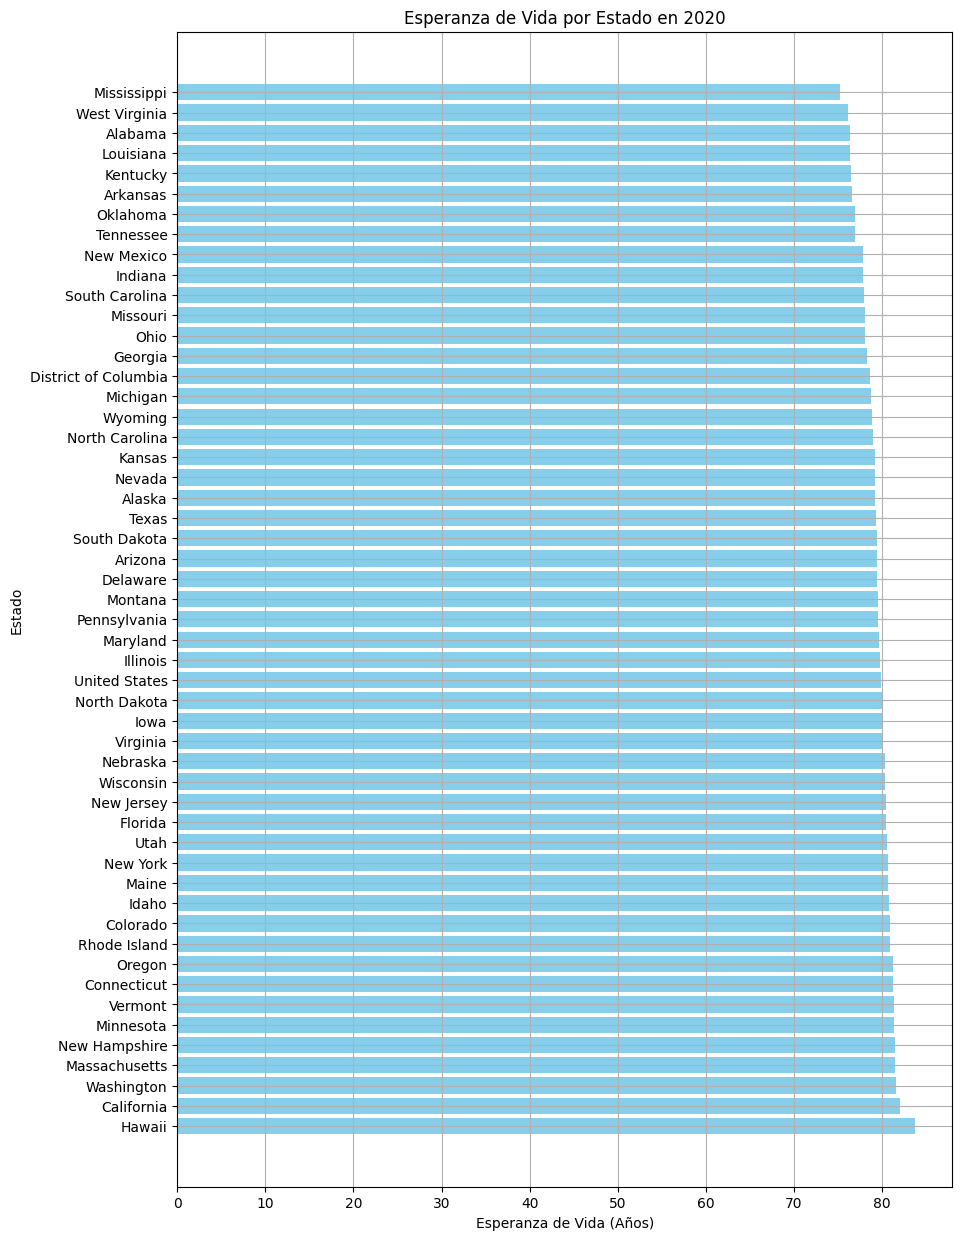

In [7]:
import matplotlib.pyplot as plt

# Ordenar los datos por la esperanza de vida para una mejor visualización
data_sorted = data.sort_values(by='le', ascending=False)

# Crear un gráfico de barras de la esperanza de vida por estado
plt.figure(figsize=(10, 15))
plt.barh(data_sorted['state'], data_sorted['le'], color='skyblue')
plt.xlabel('Esperanza de Vida (Años)')
plt.ylabel('Estado')
plt.title('Esperanza de Vida por Estado en 2020')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

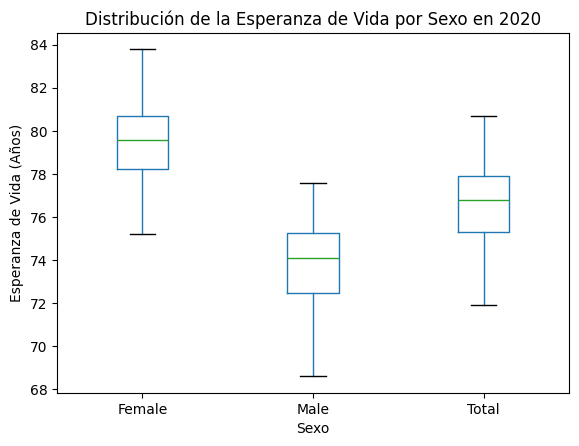

In [12]:
# Crear un gráfico de caja para mostrar la distribución de la esperanza de vida por sexo
plt.figure(figsize=(8, 6))
data.boxplot(column='le', by='sex', grid=False)
plt.title('Distribución de la Esperanza de Vida por Sexo en 2020')
plt.suptitle('')  # Eliminar el título automático
plt.xlabel('Sexo')
plt.ylabel('Esperanza de Vida (Años)')
plt.show()


In [9]:
# Encontrar el estado con la esperanza de vida más alta
max_life_expectancy = data.loc[data['le'].idxmax()]

max_life_expectancy


state            Hawaii
sex              Female
le                 83.8
se                0.159
quartile    80.0 - 83.8
Name: 115, dtype: object

La esperanza de vida más alta en el conjunto de datos es de 83.8 años, y corresponde a las mujeres en el estado de Hawái.